In [1]:
import requests as rq
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from TCGA_files import *
#from ensembleAPI import geneinfo, genesinfo
from sklearn import metrics
from hsbmpy import *
import os

In [26]:
import importlib, hsbmpy
importlib.reload(hsbmpy)
from hsbmpy import *

## query many

In [50]:
level = 1
#setup='highlyvariable_colonrectal'
#setup = 'oversigma_10tissue'
#label = 'disease_type'
label='SMTS'
#labels = ['primary_site', 'disease_type', 'disease_tissue']
#labels=['RPPA','PAM50', 'disease_type','primary_diagnosis']
#labels = ['primary_site', 'secondary_site']
algorithm = 'topsbm'
#labels = ['primary_site', 'secondary_site', 'status']
#labels=['RPPA Clusters']
directory = "/home/fvalle/phd/datasets/gtex/log/10"
L=get_max_available_L(directory, algorithm)
df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,L), header=[0])
df_clusters.head()

Cluster 1                 Cluster 2  \
0  GTEX-13O61-1226-SM-5KM21   GTEX-P4PP-1826-SM-2S1NT   
1  GTEX-14B4R-0626-SM-5TDDQ  GTEX-13PVR-1126-SM-5S2NX   
2  GTEX-1CB4J-2226-SM-7EWF5   GTEX-ZAB4-0726-SM-5HL8I   
3   GTEX-U8XE-1826-SM-4E3HV   GTEX-ZYT6-0826-SM-5E43I   
4  GTEX-16A39-1226-SM-7KUEQ  GTEX-13QJC-0626-SM-5S2O9   

                      Cluster 3                 Cluster 4  \
0  GTEX-14BIN-0011-R9a-SM-5SI76  GTEX-11GS4-0326-SM-5N9F7   
1  GTEX-12126-0011-R9b-SM-5BC6P  GTEX-17EVQ-1626-SM-79ONH   
2  GTEX-13OW5-0011-R9b-SM-5O9CL  GTEX-14ASI-1126-SM-5QGPN   
3   GTEX-X4XX-0011-R5A-SM-46MWN  GTEX-11DYG-0926-SM-5EGGW   
4  GTEX-13NYB-0011-R2a-SM-5MR3C  GTEX-13PVQ-1426-SM-5J1O4   

                  Cluster 5                 Cluster 6  \
0   GTEX-Y114-2126-SM-4TT8B   GTEX-ZGAY-0006-SM-4WWAQ   
1  GTEX-1B8SG-0126-SM-73KZ3   GTEX-ZDYS-0002-SM-4WKGR   
2  GTEX-146FQ-2126-SM-5RQHU   GTEX-ZDXO-0006-SM-4WKGF   
3  GTEX-11PRG-0726-SM-5EGL1  GTEX-139D8-0006-SM-5LZX8   
4  GTEX-13X6J-0626-SM-5LU5F  GTEX-14DAQ-0005-SM-5NQ7B   

                  Cluster 7                     Cluster 8  \
0   GTEX-WWYW-0826-SM-3NB2X  GTEX-13QJC-0011-R6a-SM-5S2VI   
1   GTEX-RU72-0126-SM-2TF6Z  GTEX-13OW8-0011-R6b-SM-5L3I3   
2   GTEX-WHSE-0626-SM-4RGNF  GTEX-14PQA-0011-R5b-SM-6AJC2   
3   GTEX-POYW-0826-SM-2XCEM  GTEX-12ZZX-0011-R8a-SM-5DUW8   
4  GTEX-12ZZY-0826-SM-5EQMT  GTEX-15SHU-0011-R4b-SM-7IGLC   

                  Cluster 9                    Cluster 10  ...  \
0   GTEX-YB5K-0426-SM-5LUA4  GTEX-13NZA-0011-R5b-SM-5KM4K  ...   
1   GTEX-Y3I4-0726-SM-4TT7M  GTEX-13PLJ-0011-R3a-SM-5O9DT  ...   
2  GTEX-16MTA-1326-SM-6PALX   GTEX-ZV68-0011-R6a-SM-51MSR  ...   
3  GTEX-14C39-0826-SM-5TDDU  GTEX-131YS-0011-R1a-SM-5DUXC  ...   
4   GTEX-XBED-1326-SM-4AT4F  GTEX-13112-0011-R1b-SM-5HL7K  ...   

                 Cluster 41                Cluster 42  \
0   GTEX-ZDXO-3026-SM-5J1N5  GTEX-16Z82-2226-SM-6LPJ7   
1  GTEX-13113-1626-SM-5EQ4I  GTEX-17F9E-1826-SM-7IGMC   
2  GTEX-13OVJ-0126-SM-5KM36  GTEX-14BMV-2426-SM-5S2PP   
3  GTEX-113IC-0126-SM-5HL6T  GTEX-17MF6-2426-SM-7LTAM   
4                       NaN  GTEX-16NGA-1026-SM-7KFS3   

                 Cluster 43                Cluster 44  \
0   GTEX-WWTW-1326-SM-4MVNT   GTEX-ZT9X-0526-SM-5GCOP   
1  GTEX-13NYS-0226-SM-5MR49   GTEX-P78B-1026-SM-3NMC4   
2                       NaN   GTEX-X585-1226-SM-46MW7   
3                       NaN  GTEX-14BIM-1326-SM-7EWD1   
4                       NaN  GTEX-13OVJ-1226-SM-5L3HA   

                Cluster 45                Cluster 46  \
0  GTEX-Z93S-0005-SM-4RGLW  GTEX-1C6VS-0826-SM-7EWEI   
1                      NaN  GTEX-11NSD-0126-SM-5987F   
2                      NaN  GTEX-12WSC-0826-SM-5EQ5Q   
3                      NaN   GTEX-R3RS-0726-SM-3GIJR   
4                      NaN  GTEX-13112-0326-SM-5P9IW   

                 Cluster 47                Cluster 48  \
0   GTEX-OXRK-0008-SM-3NB28  GTEX-133LE-1926-SM-5N9FV   
1   GTEX-Y5V6-0008-SM-4V6FV  GTEX-18D9A-2026-SM-718BL   
2  GTEX-13112-0008-SM-5YY9M   GTEX-P78B-0226-SM-3NB1Z   
3   GTEX-WXYG-0008-SM-4ONDU   GTEX-XUW1-0526-SM-4BOP3   
4  GTEX-12WSF-0008-SM-5YY8S  GTEX-14E6E-1926-SM-664N4   

                     Cluster 49                Cluster 50  
0  GTEX-13FTY-0011-R9b-SM-5KM2U   GTEX-QEG5-0926-SM-2TC64  
1   GTEX-OHPN-0011-R2A-SM-2I5FB   GTEX-XV7Q-0826-SM-4BRV7  
2  GTEX-1A8G7-0011-R2a-SM-7IGQI  GTEX-13W3W-0426-SM-5SI9D  
3                           NaN  GTEX-11EM3-0626-SM-5H12Z  
4                           NaN  GTEX-131XG-0626-SM-5GCMP  

[5 rows x 50 columns]

In [68]:
df_file = pd.read_csv("https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", sep='\t')
df_file.set_index('SAMPID', inplace=True)
df_file.dropna(how='all', axis=0).to_csv("%s/files.dat"%directory, index=True, header=True)

In [69]:
df_files = pd.read_csv("%s/files.dat"%directory, index_col=[0], header=[0]).dropna(axis=1, how='all').dropna(axis=0, how='all')
#df_files.insert(2,'disease_tissue',["%s[%s]"%(df_files.at[s,'primary_site'],df_files.at[s,'disease_type']) for s in df_files.index])
labels=df_files.columns
#df_files.groupby(['primary_site','disease_type']).count()
labels

Index(['SMATSSCR', 'SMCENTER', 'SMPTHNTS', 'SMRIN', 'SMTS', 'SMTSD', 'SMUBRID',
       'SMTSISCH', 'SMTSPAX', 'SMNABTCH', 'SMNABTCHT', 'SMNABTCHD', 'SMGEBTCH',
       'SMGEBTCHD', 'SMGEBTCHT', 'SMAFRZE', 'SMGTC', 'SME2MPRT', 'SMCHMPRS',
       'SMNTRART', 'SMMAPRT', 'SMEXNCRT', 'SMGNSDTC', 'SMUNMPRT', 'SMRDLGTH',
       'SME1MMRT', 'SMSFLGTH', 'SMESTLBS', 'SMMPPD', 'SMNTERRT', 'SMRRNANM',
       'SMRDTTL', 'SMVQCFL', 'SMTRSCPT', 'SMMPPDPR', 'SMUNPDRD', 'SMNTRNRT',
       'SMMPUNRT', 'SMEXPEFF', 'SMMPPDUN', 'SME2MMRT', 'SME2ANTI', 'SMALTALG',
       'SME2SNSE', 'SMMFLGTH', 'SME1ANTI', 'SMSPLTRD', 'SMBSMMRT', 'SME1SNSE',
       'SME1PCTS', 'SMRRNART', 'SME1MPRT', 'SMDPMPRT', 'SME2PCTS'],
      dtype='object')

In [70]:
labels = ['cases.0.diagnoses.0.prior_malignancy',
       'cases.0.diagnoses.0.tumor_grade', 'cases.0.project.primary_site',
       'cases.0.project.disease_type', 'cases.0.diagnoses.0.tumor_stage',
       'cases.0.diagnoses.0.progression_or_recurrence']
labels=['primary_site', 'disease_type']
labels=['SMTS']

True SMTS 2
error in GTEX-1GZ2Q-0011-R6a-SM-9OSWM
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8e8987dc8>


/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


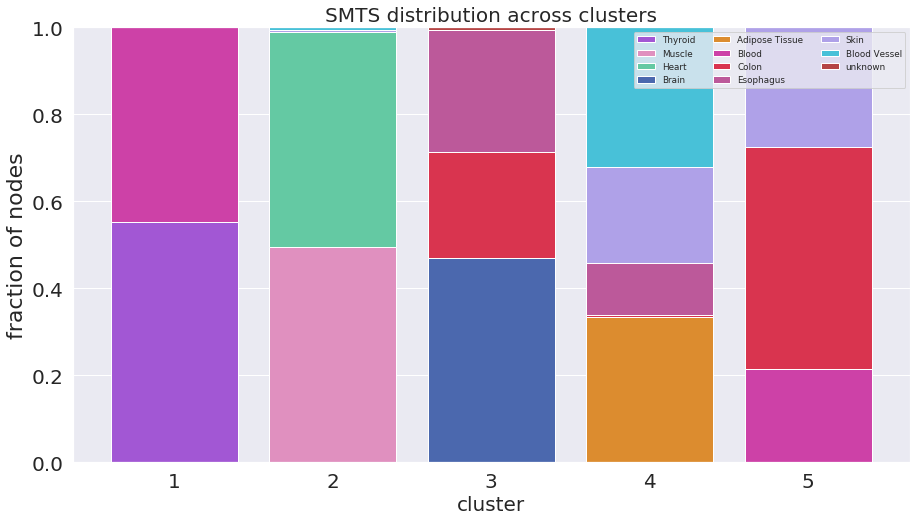

must shuffle files
True SMTS 1
error in GTEX-1GZ2Q-0011-R6a-SM-9OSWM
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8bd985708>
error in GTEX-1JJ6O-0011-R11b-SM-EXUS2
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8bd985708>


/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


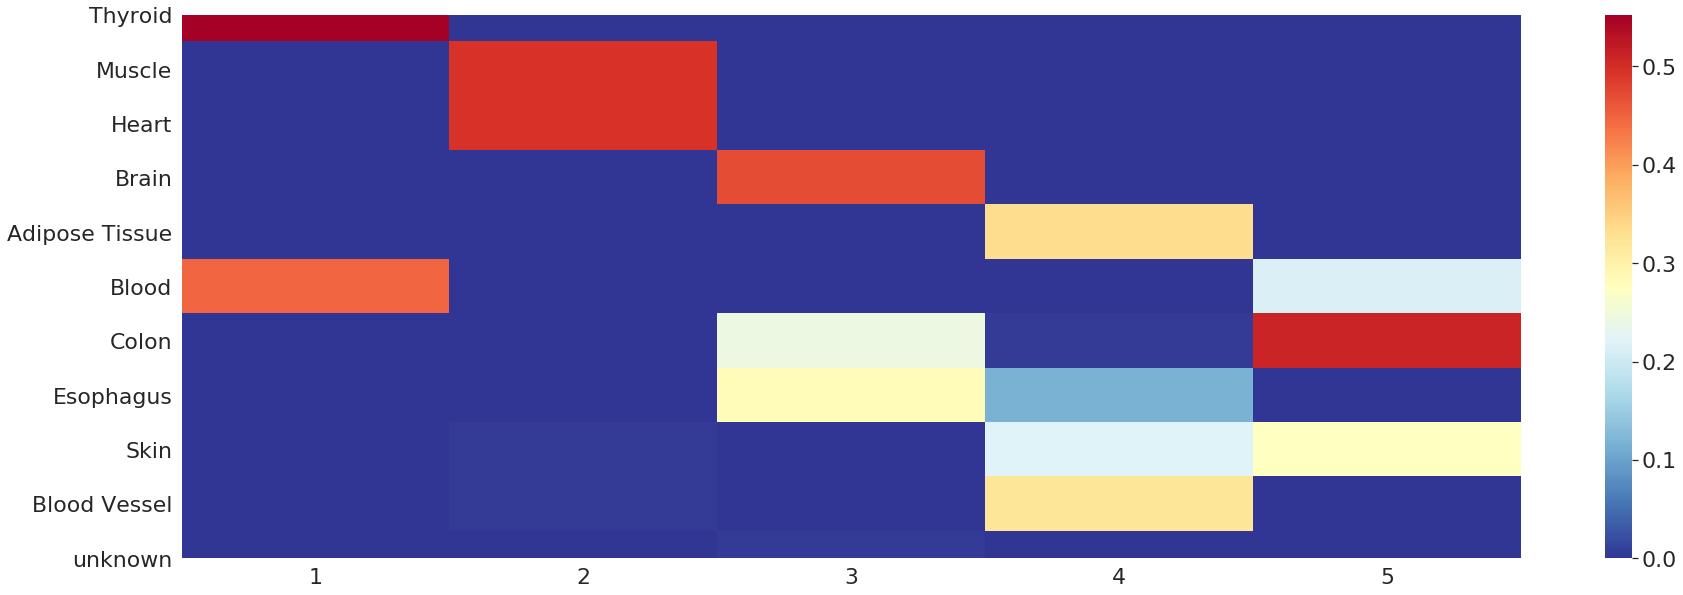

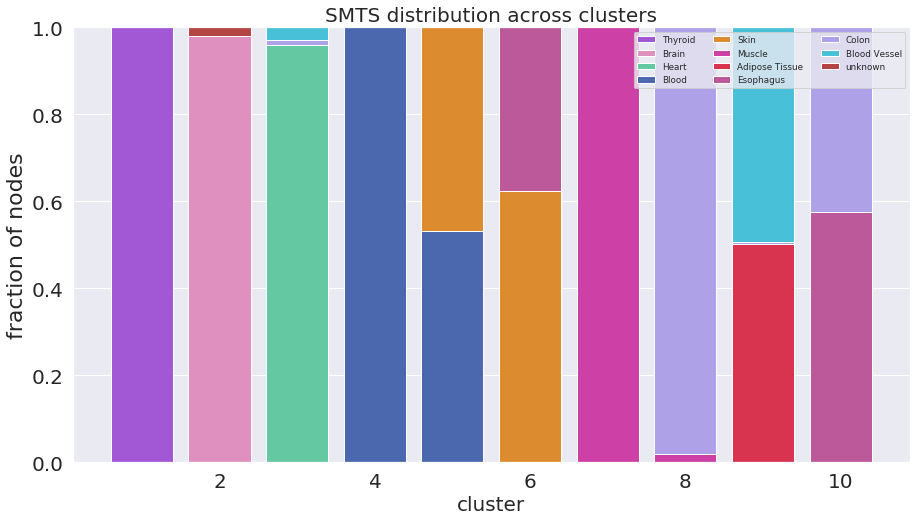

must shuffle files
True SMTS 0
error in GTEX-1GZ2Q-0011-R6a-SM-9OSWM
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8bdb51f08>
error in GTEX-1IY9M-0011-R7a-SM-D4P49
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8bdb51f08>
error in GTEX-1B8SF-0011-R6b-SM-7MXUD
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8bdb51f08>
error in GTEX-1HGF4-0011-R5b-SM-CM2ST
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8bdb51f08>


/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


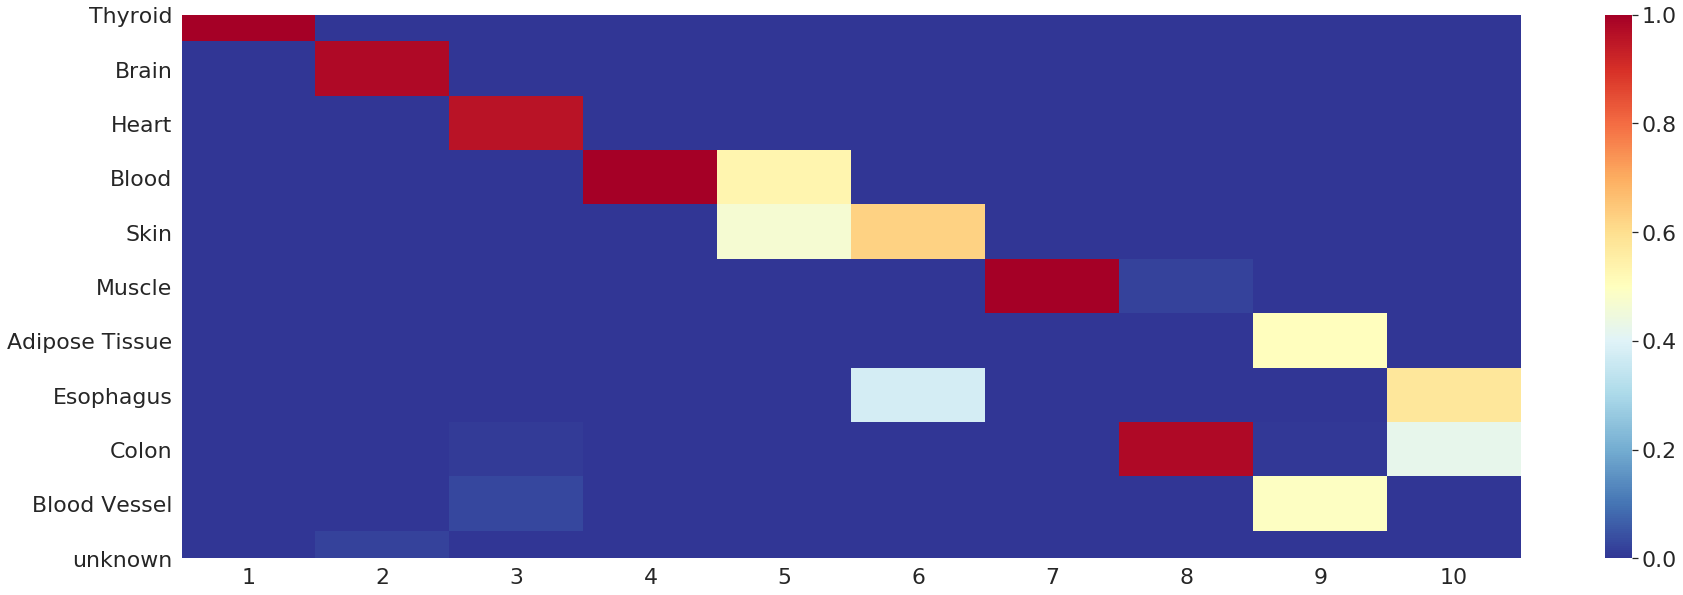

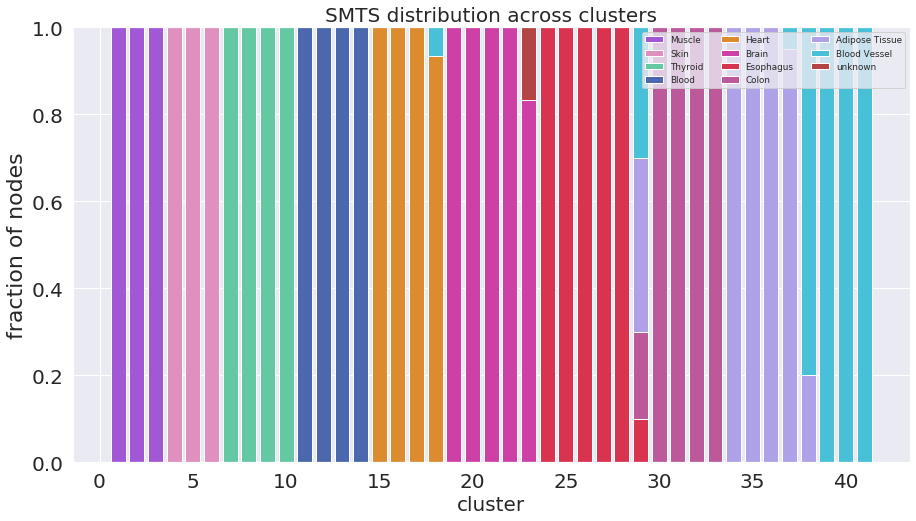

must shuffle files
False SMTS 2
error in GTEX-1GZ2Q-0011-R6a-SM-9OSWM
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8b8625548>


/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


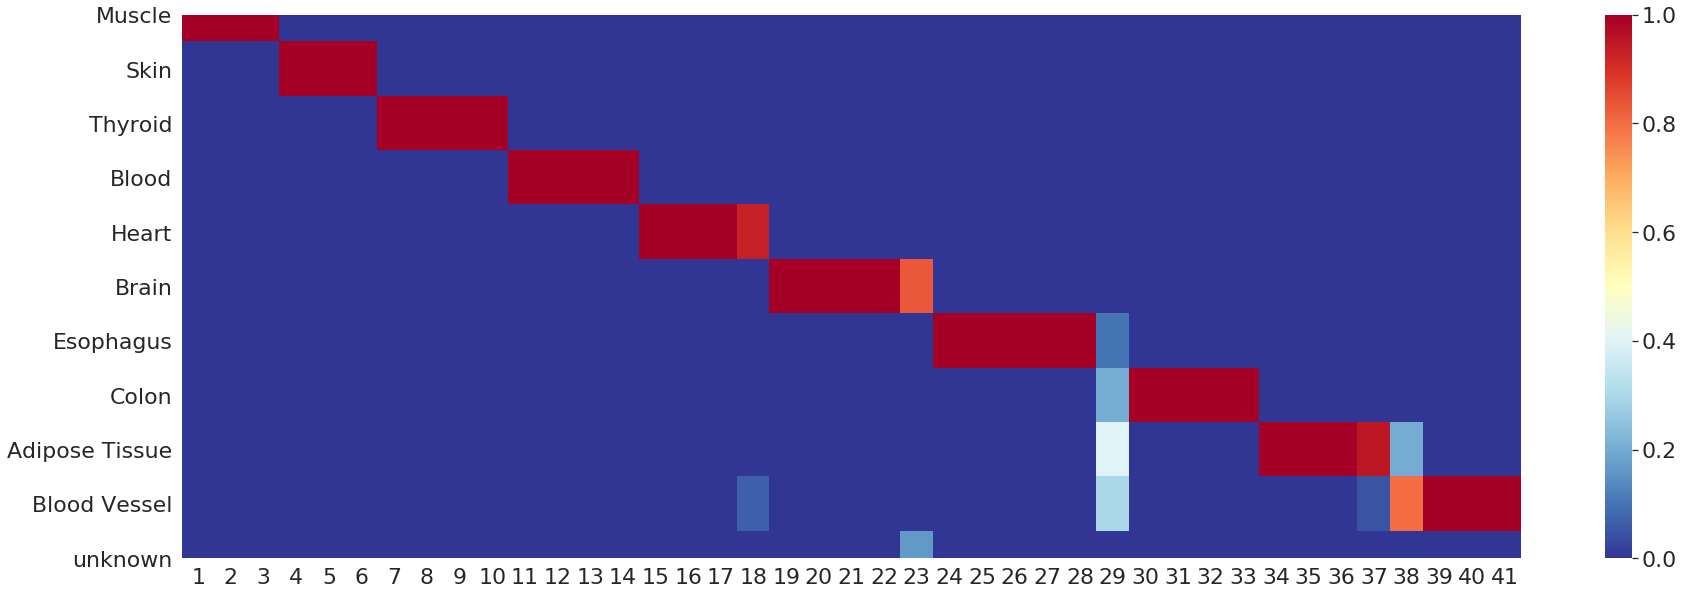

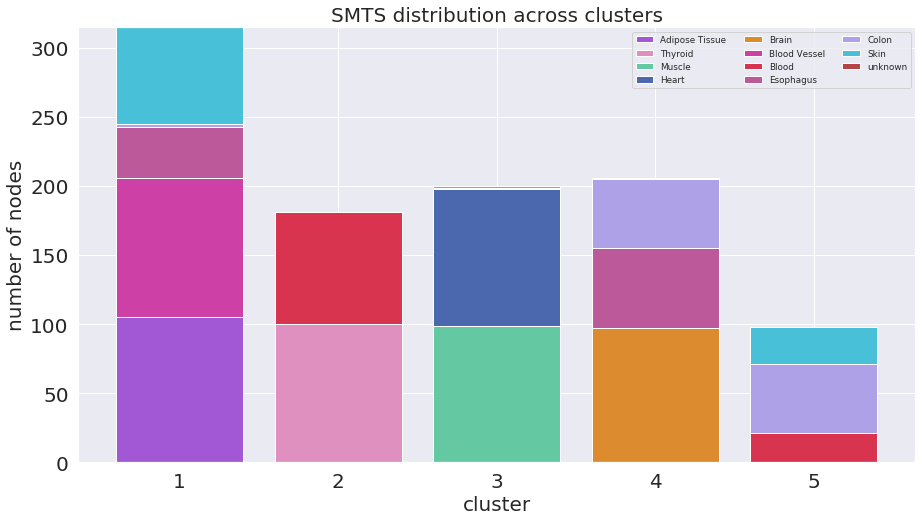

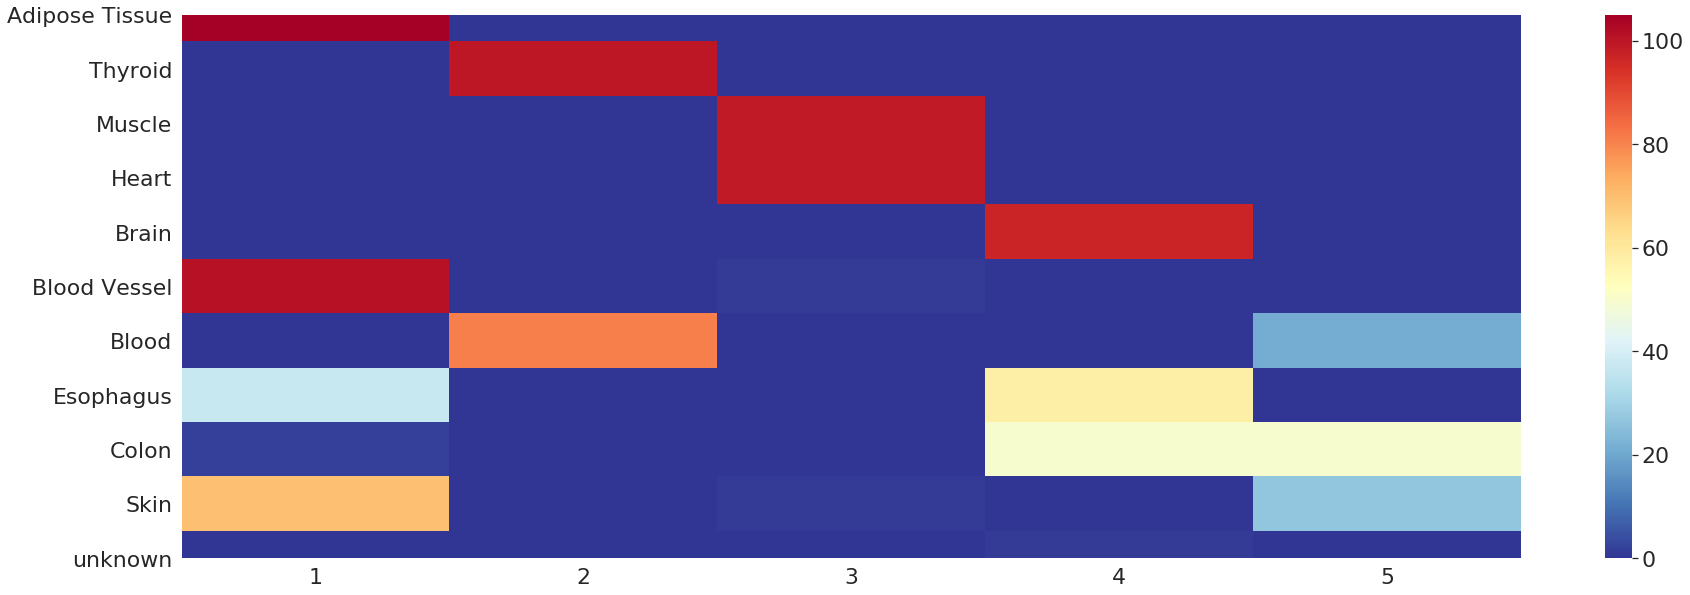

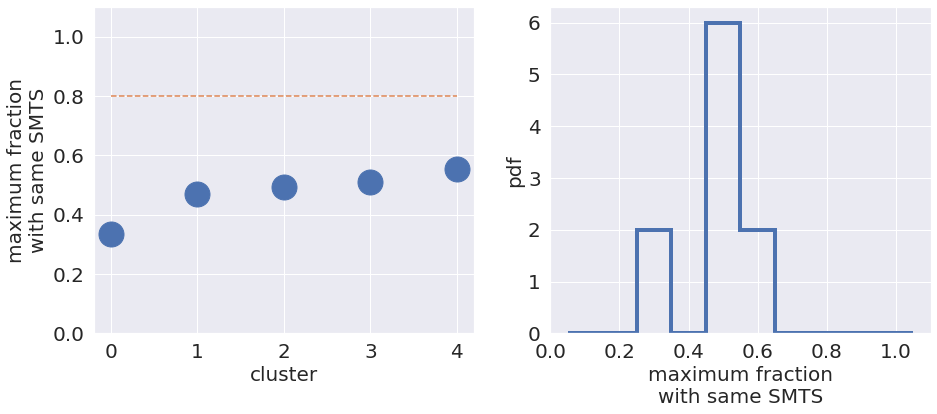

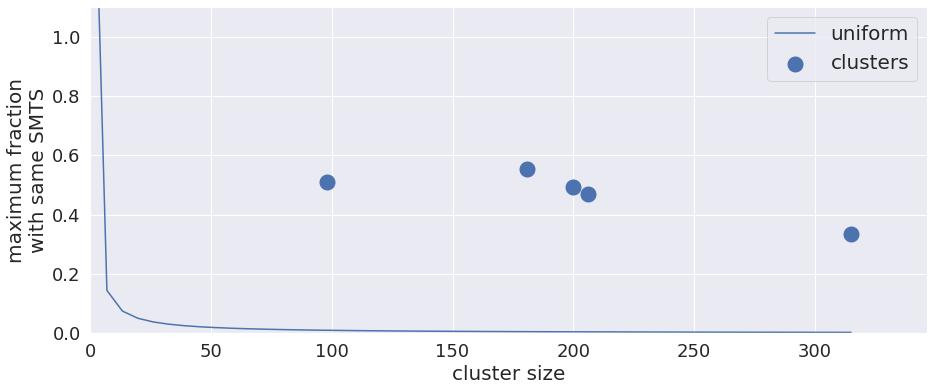

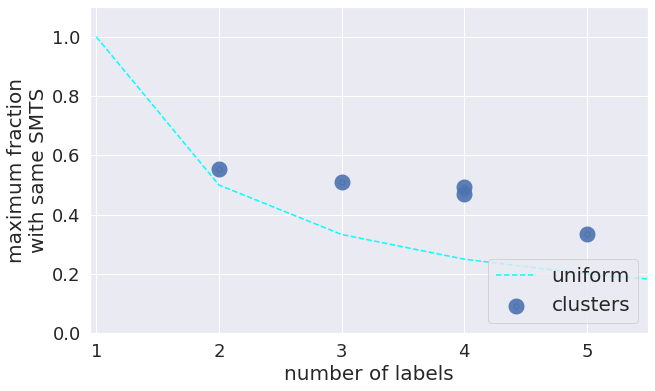

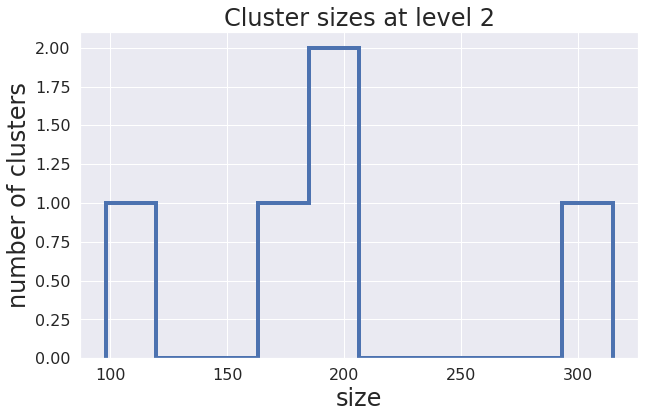

must shuffle files
False SMTS 1
error in GTEX-1GZ2Q-0011-R6a-SM-9OSWM
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8b859fac8>
error in GTEX-1JJ6O-0011-R11b-SM-EXUS2
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8b859fac8>


/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


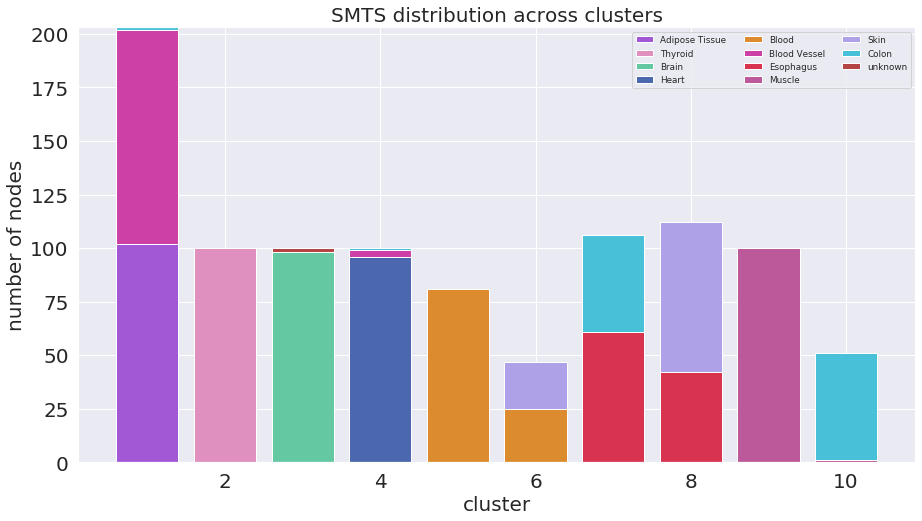

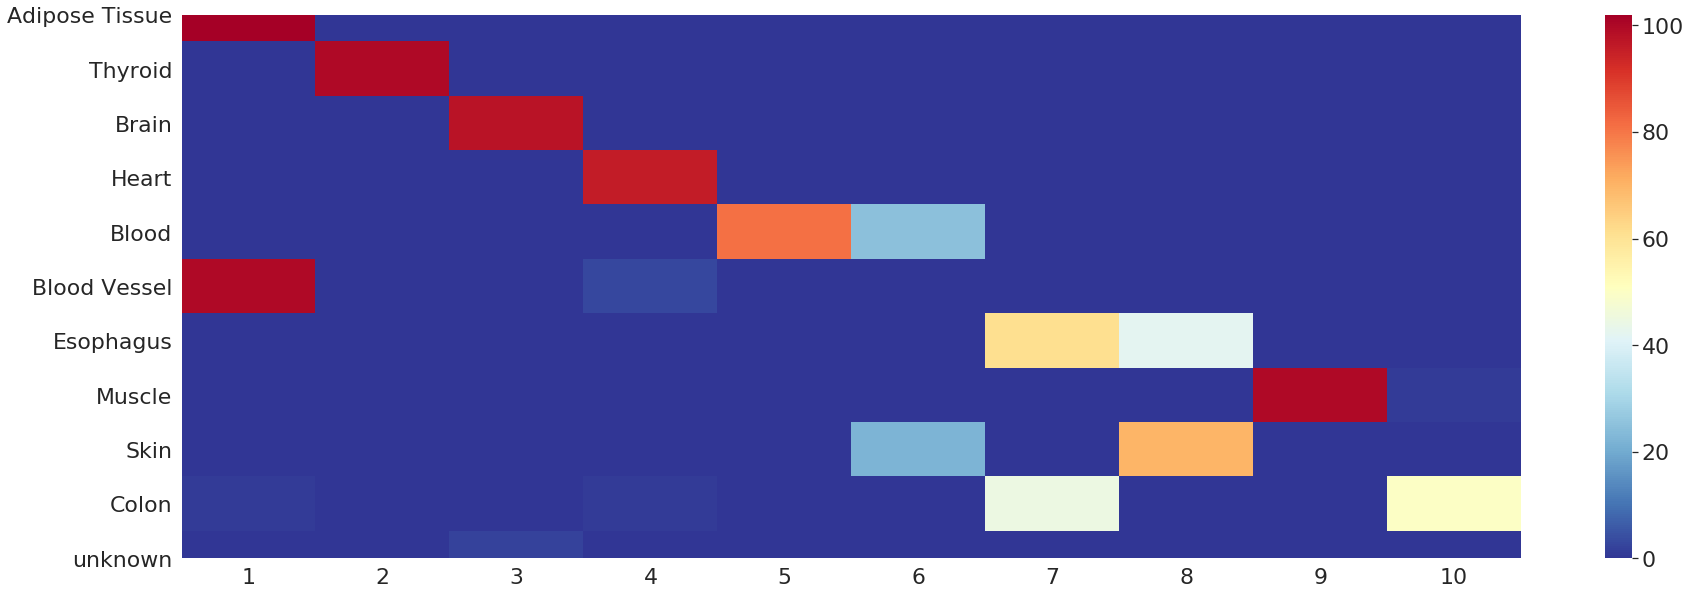

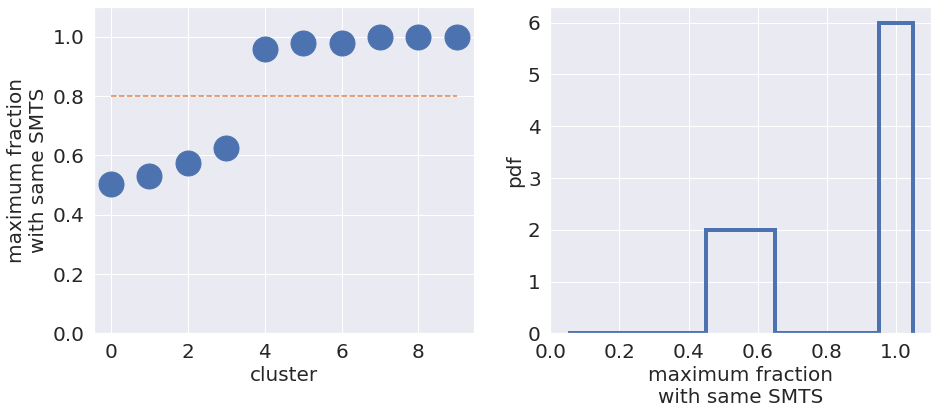

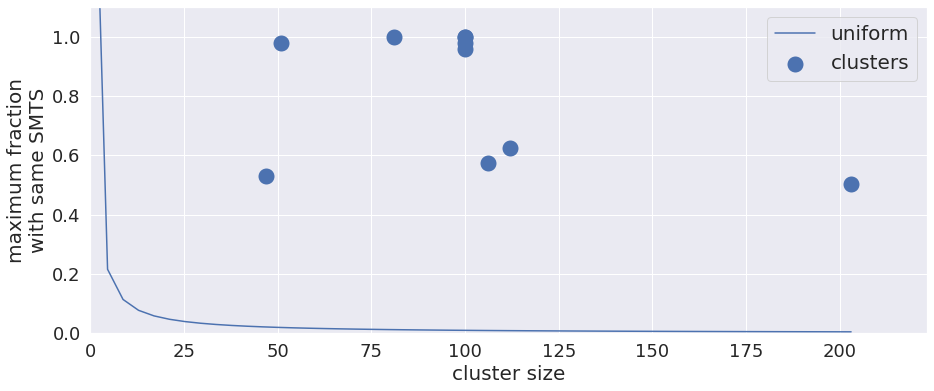

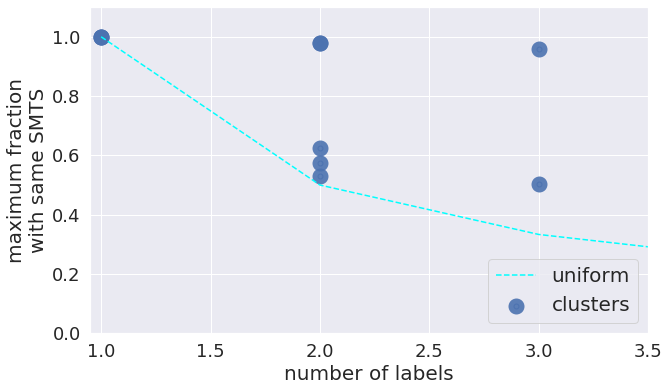

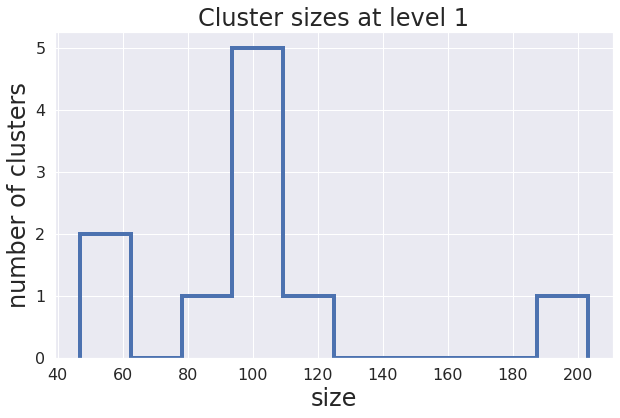

must shuffle files
False SMTS 0
error in GTEX-1GZ2Q-0011-R6a-SM-9OSWM
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8b8b3e1c8>
error in GTEX-1IY9M-0011-R7a-SM-D4P49
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8b8b3e1c8>
error in GTEX-1B8SF-0011-R6b-SM-7MXUD
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8b8b3e1c8>
error in GTEX-1HGF4-0011-R5b-SM-CM2ST
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8b8b3e1c8>


/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


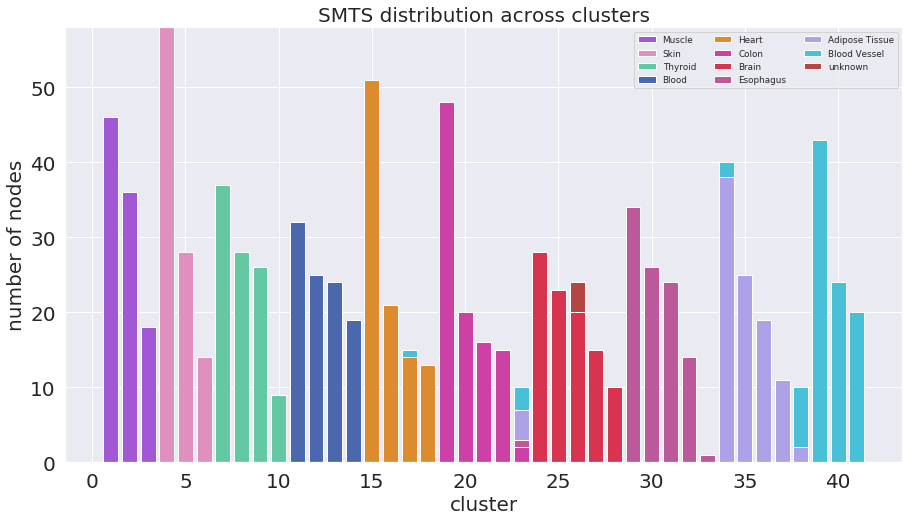

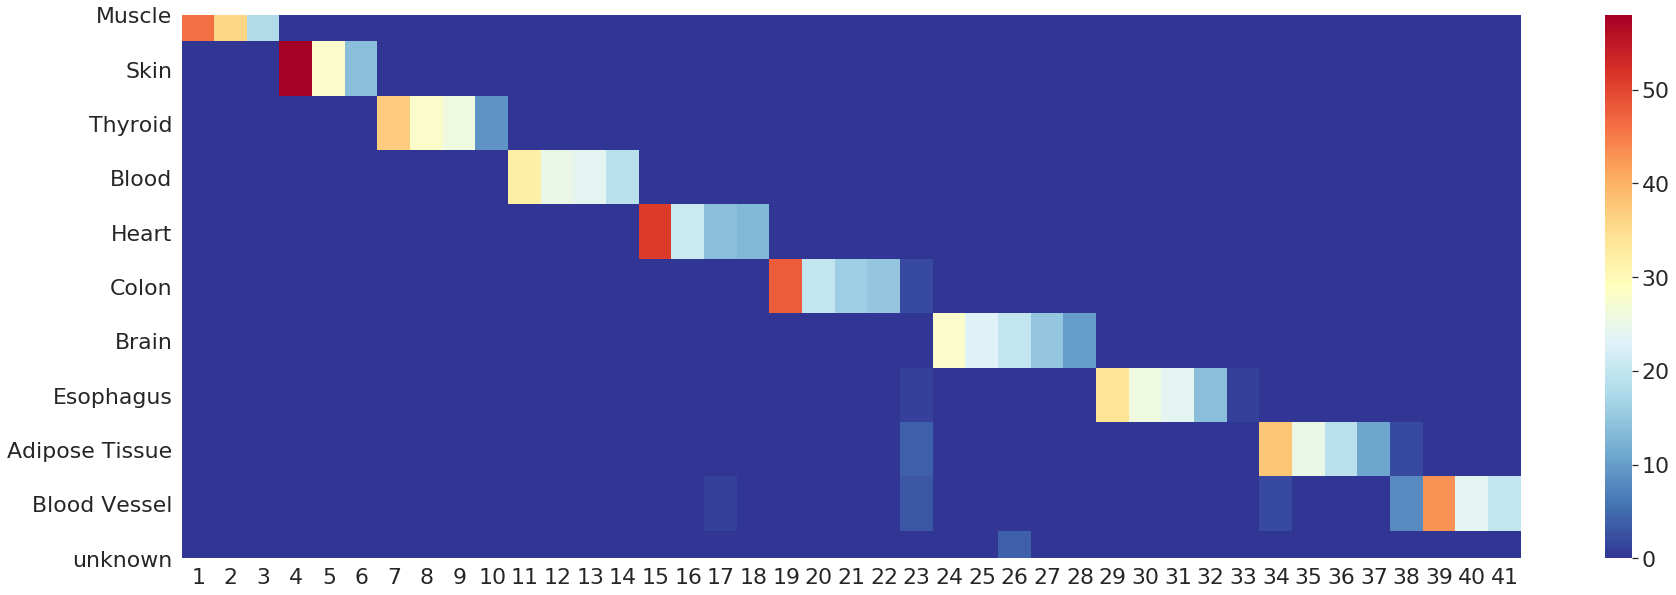

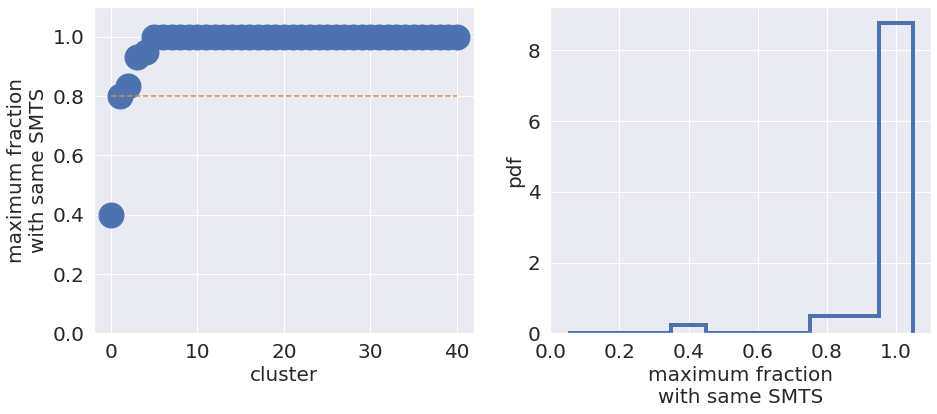

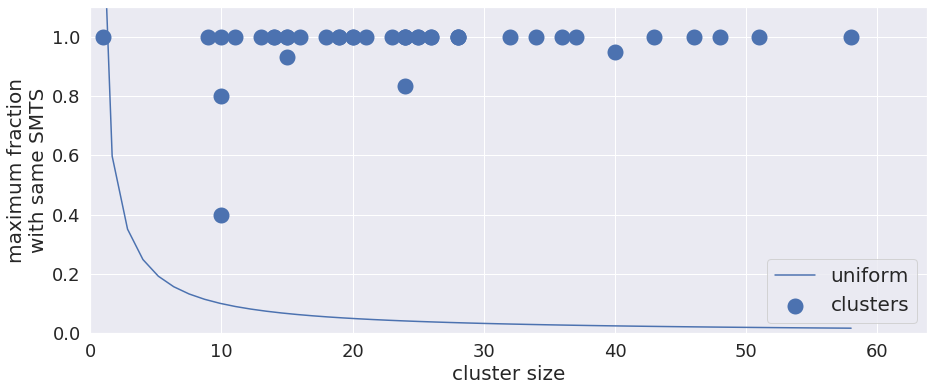

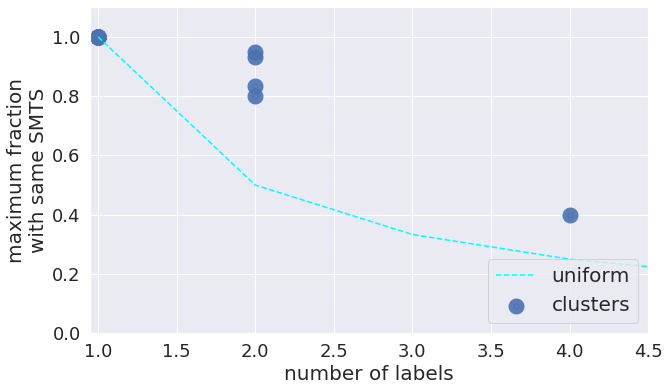

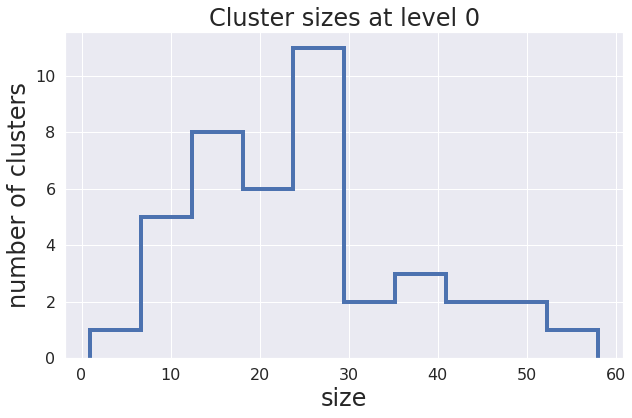

must shuffle files


In [6]:
for normalise in [True, False]:
    for label in labels:
        for level in np.arange(L+1)[::-1]:
            if level==0:
                pass
                #continue
            print(normalise, label, level)
            try:
                cluster = get_cluster_given_l(level, directory,algorithm=algorithm)
                fraction_sites = get_fraction_sites(cluster,df_files=df_files,label=label, normalise=normalise)

                #fsdf = pd.DataFrame(data=fraction_sites)
                #fsdf = fsdf.drop('Other', axis=1)
                #fsdf = fsdf.divide(fsdf.sum(axis=1), axis=0).fillna(0)
                #fraction_sites = fsdf.sort_values(by=fsdf.columns.to_list(), ascending=True).to_dict(orient='list')

                clustersinfo = get_clustersinfo(cluster,fraction_sites)
                plot_cluster_composition(fraction_sites,directory,level,label=label, normalise=normalise,algorithm=algorithm)
                make_heatmap(fraction_sites, directory, label, level, normalise=normalise,algorithm=algorithm)

                clustersinfo = get_clustersinfo(cluster,fraction_sites)            
                if not normalise:
                    plot_maximum(clustersinfo,cluster,label,level, directory,algorithm=algorithm)
                    plot_maximum_size(clustersinfo,label,level, directory,algorithm=algorithm)
                    plot_maximum_label(clustersinfo,label,level, directory,algorithm=algorithm)
                    plot_sizes(level,directory, algorithm=algorithm)
            except:
                print(*sys.exc_info())
            try:
                fraction_sites_shuffle = get_fraction_sites(cluster, pd.read_csv("%s/files_shuffles.dat"%directory, index_col=[0]),label=label, normalise=normalise)
                clustersinfo_shuffle = get_clustersinfo(cluster, fraction_sites_shuffle)
                plot_cluster_composition(fraction_sites_shuffle,directory,level, label=label, shuffled=True, normalise=normalise)
                if not normalise:
                    plot_maximum(clustersinfo,cluster,label,level,directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_maximum_size(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_maximum_label(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_labels_size(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
            except:
                print("must shuffle files")

In [ ]:
##useful for R clustree plot
def reindex(x):
    i=1
    last=x[0]
    new = []
    for xi in x:
        if xi == last:
            pass
        else:
            i+=1
            last=xi
        new.append(i)
    return new

df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,L), header=[0])
df_labels = pd.DataFrame()
shape = df_clusters.dropna().shape
files = df_clusters.dropna().values.reshape(shape[0]*shape[1],)
for level in np.arange(L+1)[:0:-1]:
    print(level)
    df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,level), header=[0])
    currentlevellabels = []
    for file in files:
        s = df_clusters[df_clusters.isin([file])].any(0)
        a = s.index[s]
        currentlevellabels.append(int(a[0][8:])-1)
    df_labels.insert(0,'l%d'%level,currentlevellabels)
    del currentlevellabels
filelabels = []
filesublabels = []
for file in files:
    try:
        filelabels.append(get_file(file, df_files)[labels[0]])
        filesublabels.append(get_file(file, df_files)[labels[1]])
    except:
        filelabels.append('unknown')
        filesublabels.append('unknown')
        print(*sys.exc_info())
df_labels.insert(0,'tissue', filelabels)
df_labels.insert(0,'subtissue', filesublabels)
df_labels.sort_values(by=['tissue','subtissue'], inplace=True)
df_labels.sort_values(by=["l%d"%l for l in np.arange(L+1)[:0:-1]], axis=0, inplace=True)
filelabels = df_labels['tissue']
filesublabels = df_labels['subtissue']
df_labels = df_labels.apply(reindex, axis=0)
df_labels['tissue']=filelabels
df_labels['subtissue']=filesublabels
df_labels.to_csv("%s/%s/topsbm_labels.csv"%(directory,algorithm), index=False, header=True)

In [7]:
if "clustersizes.txt" in os.listdir(directory):
    with open("%s/clustersizes.txt"%directory, 'r') as f:
        xl=np.array(f.read().split()).astype(int)
else:
    try:
        xl = getclustersizesarray(directory, L)
        with open("%s/clustersizes.txt" % directory, 'w') as f:
            for x in xl:
                f.write("%d\n" % x)
    except:
        print(*sys.exc_info())
        print("cannot save clustersizes.txt")

if "topicsizes.txt" in os.listdir(directory):
    with open("%s/topicsizes.txt"%directory) as f:
        tl=np.array(f.read().split()).astype(int)
else:
    try:
        tl = gettopicsizesarray(directory, L)
        with open("%s/topicsizes.txt" % directory, 'w') as f:
            for x in tl:
                f.write("%d\n" % x)
    except:
        print("cannot save topicsizes.txt")

In [71]:
scores = get_scores(directory, labels, verbose=False)
scores['hsbm'] = scores['SMTS']

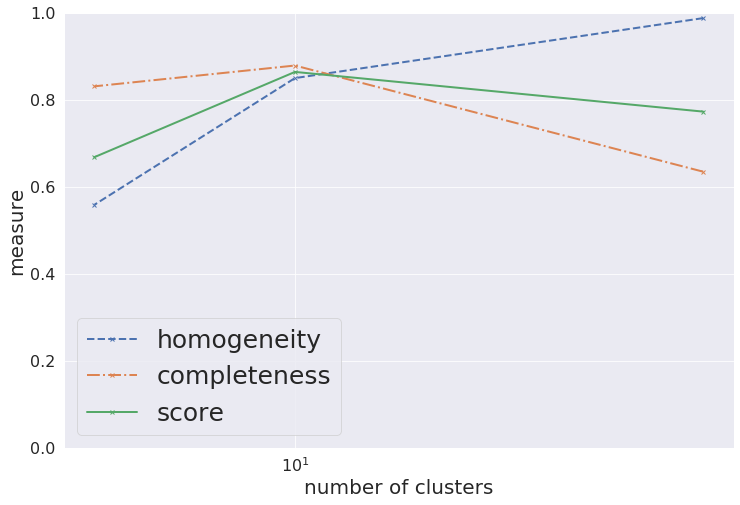

In [76]:
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
#add_score_lines(ax,scores,[labels[0]],xl, h=True, c=True, alpha=1)
h = np.array(scores['hsbm']['h'])
c = np.array(scores['hsbm']['c'])
ax.plot(scores['hsbm']['xl'],h, marker='x', ls='--', lw=2, label='homogeneity')
ax.plot(scores['hsbm']['xl'],c, marker='x', ls='-.', lw=2,label='completeness')
ax.plot(scores['hsbm']['xl'],scores['hsbm']['V'], marker='x', ls='-', lw=2, label='score')
ax.set_xscale('log')
ax.set_ylim(0,1)
#ax.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=25)
plt.xlabel('number of clusters', fontsize=20)
plt.ylabel('measure', fontsize=20)
plt.show()
fig.savefig("%s/metric_scores_primarysite.pdf"%(directory))

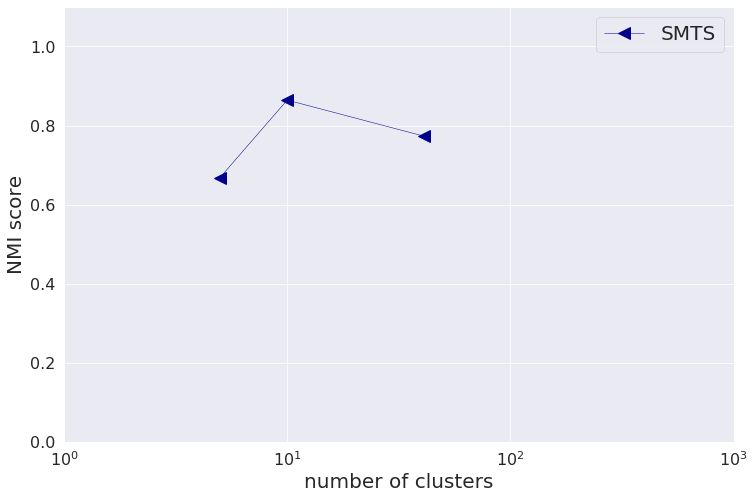

In [73]:
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,['SMTS'])
#h = np.array(scores['primary_site']['h'])
#c = np.array(scores['secondary_site']['c'])
#ax.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(1,1000)
plt.show()
fig.savefig("%s/metric_scores.pdf"%(directory))

In [77]:
scores = {}
scores['hsbm'] = get_scores(directory, labels, df_files=df_files, verbose=False)['SMTS']
scores['hierarchical'] = get_scores(directory, labels, algorithm='hierarchical', verbose=False)['SMTS']
scores['lda'] = get_scores(directory, labels, algorithm='lda', verbose=False)['SMTS']
#scores['kmeans'] = get_scores(directory, labels, algorithm='kmeans', verbose=False)['SMTS']
#scores['tm']=get_scores(directory, labels, algorithm='tm', verbose=False)['primary_site']
#scores['cc']=get_scores(directory, labels, algorithm='cc', verbose=False)['primary_site']
#scores['shuffle'] = get_scores_shuffled(directory, df_files,label='primary_site', algorithm='lda')
#scores['wgcna']=get_scores(directory, labels, algorithm='wgcna', verbose=False)['primary_site']

In [ ]:
scores['hierarchical'] = get_scores(directory, labels, algorithm='hierarchical', verbose=False)['primary_site']
scores['hierarchicaleuclidean'] = get_scores(directory, labels, algorithm='hierarchicaleuclidean', verbose=False)['primary_site']
scores['lda'] = get_scores(directory, labels, algorithm='lda', verbose=False)['primary_site']
#scores['hsbm->hierachical'] = pd.read_csv("%s/hierhsbm.scores"%directory).to_dict(orient='list')
scores['hsbm'] =  get_scores(directory, labels, algorithm='topsbm', verbose=False)['primary_site']
scores['tm']=get_scores(directory, labels, algorithm='tm', verbose=False)['primary_site']
scores['wgcna']=get_scores(directory, labels, algorithm='wgcna', verbose=False)['primary_site']
scores['cc']=get_scores(directory, labels, algorithm='cc', verbose=False)['primary_site']
scores['shuffle'] = get_scores_shuffled(directory, df_files,label='primary_site', algorithm='topsbm')

No score for tm
No score for wgcna
No score for shuffle


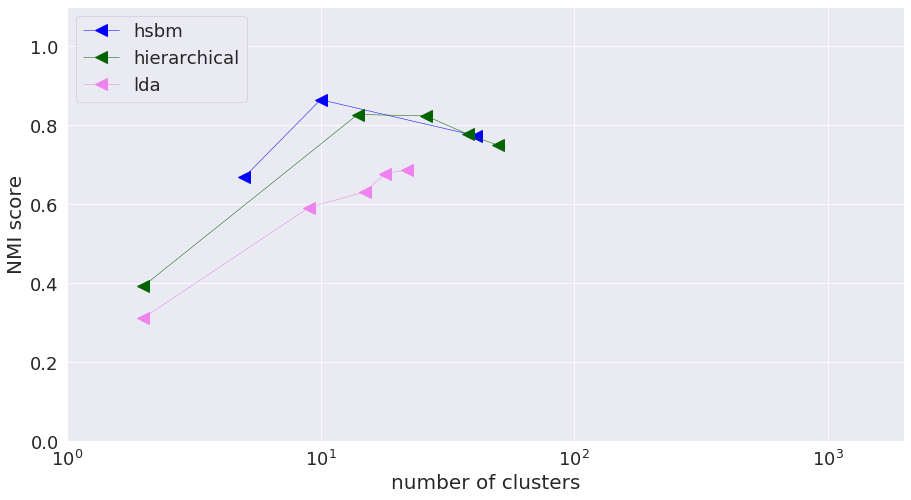

In [78]:
fig=plt.figure(figsize=(15,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,labels=['hsbm', 'tm', 'hierarchical', 'lda', 'wgcna', 'shuffle'])
plt.tick_params(labelsize=18)
#ax.set_xscale('linear')
plt.xlim(1,2000)
plt.legend(ncol=1, fontsize=18,loc='upper left' )
plt.show()
fig.savefig("%s/metric_scores_all.pdf"%(directory))

In [20]:
scores

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee9fc08>
error searching SMTS in GTEX-15UF7-1926-SM-6LPJT
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef03ce48>
error searching SMTS in GTEX-14PJ6-0226-SM-6AJ9K
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef03ce48>
error searching SMTS in GTEX-17GQL-0126-SM-72D5Q
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef03ce48>
error searching SMTS in GTEX-ZP4G-0326-SM-4YCEF
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef03c848>
error searching SMTS in GTEX-P4PP-0926-SM-48TBZ
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef03c848>
error searching SMTS in GTEX-ZEX8-0726-SM-4WKH8
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef03c848>
error searching SMTS in GTEX-WFON-012

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ea988>
error searching SMTS in GTEX-WFG7-1326-SM-4LMK1
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ea988>
error searching SMTS in GTEX-13RTK-0226-SM-5RQHR
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ee088>
error searching SMTS in GTEX-11TT1-1026-SM-5PNW7
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ee088>
error searching SMTS in GTEX-Q2AH-1126-SM-48TZM
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ee088>
error searching SMTS in GTEX-1CAMR-0726-SM-7EPIE
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef03cbc8>
error searching SMTS in GTEX-P4PP-1526-SM-3P61M
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef03cbc8>
error searching SMTS in GTEX-145ME-10

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f1848>
error searching SMTS in GTEX-ZVT4-0326-SM-51MS5
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6dfdc8>
error searching SMTS in GTEX-ZYT6-1626-SM-5E45R
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6dfdc8>
error searching SMTS in GTEX-ZDXO-0326-SM-4WKHJ
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6dfdc8>
error searching SMTS in GTEX-14ABY-0126-SM-62LDI
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6dfdc8>
error searching SMTS in GTEX-YBZK-0326-SM-59HLN
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6dfdc8>
error searching SMTS in GTEX-YJ8O-2826-SM-5CVM4
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6dfdc8>
error searching SMTS in GTEX-139TU-0526

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6df088>
error searching SMTS in GTEX-Y5LM-0526-SM-4V6G3
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6fdb48>
error searching SMTS in GTEX-ZT9W-0926-SM-57WFS
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6fdb48>
error searching SMTS in GTEX-13W3W-1026-SM-5IFG4
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6fdb48>
error searching SMTS in GTEX-14BMU-0726-SM-73KXS
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6fdb48>
error searching SMTS in GTEX-1B996-1326-SM-731EO
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6fdb48>
error searching SMTS in GTEX-SNOS-0926-SM-4DM7A
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6fdb48>
error searching SMTS in GTEX-QEL4-132

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6eaa48>
error searching SMTS in GTEX-1CB4H-2726-SM-7EWFF
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6eaa48>
error searching SMTS in GTEX-14BIM-2226-SM-5SI8Y
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6eaa48>
error searching SMTS in GTEX-1A8FM-2326-SM-7MKGC
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6eaa48>
error searching SMTS in GTEX-P78B-2526-SM-3P5ZY
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6eaa48>
error searching SMTS in GTEX-14BIN-1526-SM-73KZ7
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6eaa48>
error searching SMTS in GTEX-XYKS-0826-SM-4BRVF
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ea648>
error searching SMTS in GTEX-ZAK1-15

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f1848>
error searching SMTS in GTEX-RWSA-2026-SM-47JX8
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f1848>
error searching SMTS in GTEX-14E6E-1126-SM-5S2R4
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f1848>
error searching SMTS in GTEX-RWS6-0626-SM-2XCAS
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f6648>
error searching SMTS in GTEX-11GS4-0826-SM-5986J
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f6648>
error searching SMTS in GTEX-13VXT-0626-SM-5SIA1
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f6648>
error searching SMTS in GTEX-15UF6-1126-SM-6LPJ3
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f6648>
error searching SMTS in GTEX-15G1A-0

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f1748>
error searching SMTS in GTEX-14ICL-1226-SM-5S2RD
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6df048>
error searching SMTS in GTEX-14JG6-1626-SM-5YYBC
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6df048>
error searching SMTS in GTEX-12WSL-1326-SM-5LZVW
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6df048>
error searching SMTS in GTEX-11DYG-1926-SM-5H12I
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6df048>
error searching SMTS in GTEX-TKQ1-1226-SM-4GICJ
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6df048>
error searching SMTS in GTEX-XQ8I-1826-SM-4BOOJ
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6df048>
error searching SMTS in GTEX-1212Z-1

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f6e48>
error searching SMTS in GTEX-12ZZY-1226-SM-5GCNK
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f6e48>
error searching SMTS in GTEX-16MT8-0826-SM-7KULO
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeebbd48>
error searching SMTS in GTEX-15CHQ-1326-SM-6871Z
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeebbd48>
error searching SMTS in GTEX-YFC4-0726-SM-62LF6
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeebbd48>
error searching SMTS in GTEX-P4QS-0326-SM-2I3EU
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeebbd48>
error searching SMTS in GTEX-16NPV-0011-R8a-SM-7EPH8
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeebbd48>
error searching SMTS in GTEX-16Z

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6989c8>
error searching SMTS in GTEX-14E6D-2926-SM-664OP
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6fdb48>
error searching SMTS in GTEX-ZF28-2926-SM-4WKG1
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeeb6648>
error searching SMTS in GTEX-13FHP-0011-R11b-SM-5LZXP
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeeb6648>
error searching SMTS in GTEX-WL46-2826-SM-3LK81
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeeb6648>
error searching SMTS in GTEX-TSE9-2926-SM-3DB77
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeeb6648>
error searching SMTS in GTEX-ZVT2-0008-SM-57WC9
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee688c08>
error searching SMTS in GTEX-12C5

error searching SMTS in GTEX-14PHY-0626-SM-664NN
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeeb6ac8>
error searching SMTS in GTEX-Y111-0526-SM-4TT3M
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeeb6ac8>
error searching SMTS in GTEX-1BAJH-0326-SM-73KWM
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee69bf08>
error searching SMTS in GTEX-17GQL-0126-SM-72D5Q
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee69bf08>
error searching SMTS in GTEX-WQUQ-1626-SM-4OOSH
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee69bf08>
error searching SMTS in GTEX-QLQ7-0826-SM-447B3
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee69bf08>
error searching SMTS in GTEX-W5WG-1626-SM-4LMKG
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee68f1c8>
error searching SMTS in GTEX-Y111-0926-SM-4SOIU
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef03c9c8>
error searching SMTS in GTEX-P4QS-1326-SM-3NMCD
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef03c9c8>
error searching SMTS in GTEX-131XF-0726-SM-5GIE5
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef03c9c8>
error searching SMTS in GTEX-1117F-2926-SM-5GZYI
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef03c9c8>
error searching SMTS in GTEX-1AYD5-1226-SM-7EWEP
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef03c9c8>
error searching SMTS in GTEX-13D11-1926-SM-5IFGB
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef03c9c8>
error searching SMTS in GTEX-QEG4-03

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee68aa08>
error searching SMTS in GTEX-18D9A-0826-SM-718C1
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee69f3c8>
error searching SMTS in GTEX-11UD2-0626-SM-5GU6L
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ee508>
error searching SMTS in GTEX-ZVT4-0008-SM-57WCA
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ee908>
error searching SMTS in GTEX-U8XE-1826-SM-4E3HV
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ee908>
error searching SMTS in GTEX-13111-1926-SM-5GCOL
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ee908>
error searching SMTS in GTEX-11EM3-2226-SM-5H11Y
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee69f308>
error searching SMTS in GTEX-11ONC-0

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee682448>
error searching SMTS in GTEX-11O72-2926-SM-5BC4V
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee68fd88>
error searching SMTS in GTEX-145MG-0011-R10a-SM-5PNWG
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee688e48>
error searching SMTS in GTEX-17HG3-0011-R5a-SM-7DUEW
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee68f108>
error searching SMTS in GTEX-12ZZZ-0011-R6b-SM-5EQ5B
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee68f5c8>
error searching SMTS in GTEX-11GSO-2926-SM-5HL73
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee68f5c8>
error searching SMTS in GTEX-16YQH-3026-SM-79OMM
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ee0c8>
error searching SMTS 

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee68a948>
error searching SMTS in GTEX-12WSE-2926-SM-5RQJ9
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee688e48>
error searching SMTS in GTEX-11ZTS-3226-SM-5EGID
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee688e48>
error searching SMTS in GTEX-183WM-0011-R11a-SM-718A5
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee688e48>
error searching SMTS in GTEX-132Q8-2926-SM-5IFFP
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee682608>
error searching SMTS in GTEX-14JFF-2826-SM-6871Q
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee682608>
error searching SMTS in GTEX-12WSM-2126-SM-5GCOC
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee682608>
error searching SMTS in GTEX-

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee48248>
error searching SMTS in GTEX-14PJM-2926-SM-69LOE
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee48248>
error searching SMTS in GTEX-1AX9I-0326-SM-73KXQ
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee48248>
error searching SMTS in GTEX-XYKS-1326-SM-4BRUN
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee48248>
error searching SMTS in GTEX-UPK5-0126-SM-3GADM
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee48248>
error searching SMTS in GTEX-139TT-2226-SM-5LZWO
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee48248>
error searching SMTS in GTEX-ZTSS-1926-SM-57WEW
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee48248>
error searching SMTS in GTEX-12ZZW-00

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6fa208>
error searching SMTS in GTEX-XQ3S-1226-SM-4BOPP
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeebb7c8>
error searching SMTS in GTEX-14ABY-0011-R6a-SM-5PNWR
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeebb7c8>
error searching SMTS in GTEX-WQUQ-2426-SM-4MVNW
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeebb7c8>
error searching SMTS in GTEX-ZC5H-0004-SM-4WAXK
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeebb7c8>
error searching SMTS in GTEX-13NYB-0011-R9b-SM-5MR5P
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeebb7c8>
error searching SMTS in GTEX-UTHO-0008-SM-4JBID
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feeebb7c8>
error searching SMTS in GTEX-O

error searching SMTS in GTEX-U3ZN-0008-SM-4DXTL
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6eef08>
error searching SMTS in GTEX-13O21-2426-SM-5MR4A
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6eef08>
error searching SMTS in GTEX-11EM3-1726-SM-5N9D1
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6eef08>
error searching SMTS in GTEX-XV7Q-0126-SM-4BRVK
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6eef08>
error searching SMTS in GTEX-WXYG-2026-SM-4E3IY
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6eef08>
error searching SMTS in GTEX-14BIN-2426-SM-5TDCF
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6eef08>
error searching SMTS in GTEX-11WQK-2226-SM-5CVL7
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6eed48>
error searching SMTS in GTEX-OXRK-0008-SM-3NB28
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee68ab88>
error searching SMTS in GTEX-11GSP-0011-R6b-SM-57WBQ
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6fd948>
error searching SMTS in GTEX-13FH7-0226-SM-5IFGG
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6fd948>
error searching SMTS in GTEX-13VXU-2826-SM-664MA
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6fd948>
error searching SMTS in GTEX-17MFQ-0926-SM-7LG4S
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6fd948>
error searching SMTS in GTEX-YFC4-0011-R4a-SM-4RGLQ
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6fd948>
error searching SMTS in GTEX

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f1348>
error searching SMTS in GTEX-W5X1-2826-SM-3GILM
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f1348>
error searching SMTS in GTEX-Y3I4-0008-SM-4TT21
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f1348>
error searching SMTS in GTEX-139T4-0008-SM-5S2WF
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f1348>
error searching SMTS in GTEX-11DXW-0008-SM-5Q59V
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f1348>
error searching SMTS in GTEX-R55E-0008-SM-48FCG
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f1348>
error searching SMTS in GTEX-ZF2S-0008-SM-4E3IK
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6f1348>
error searching SMTS in GTEX-139TS-000

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ee088>
error searching SMTS in GTEX-14C5O-0526-SM-62LEI
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feecd9388>
error searching SMTS in GTEX-13OVK-1026-SM-7KFTC
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feecd9388>
error searching SMTS in GTEX-15DYW-2426-SM-7KUG8
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feecd9388>
error searching SMTS in GTEX-17KNJ-0526-SM-7LTA8
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feecd9388>
error searching SMTS in GTEX-15CHC-2026-SM-6EU1Z
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feecd9388>
error searching SMTS in GTEX-13OW6-1526-SM-5L3HX
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feecd9388>
error searching SMTS in GTEX-XQ3S-

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6abb48>
error searching SMTS in GTEX-13D11-0426-SM-5LZYA
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6abb48>
error searching SMTS in GTEX-ZV68-0011-R10a-SM-51MT7
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6abb48>
error searching SMTS in GTEX-14PQA-0011-R4b-SM-6AJBU
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6abb48>
error searching SMTS in GTEX-12WSD-0011-R1b-SM-5LZVY
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6abb48>
error searching SMTS in GTEX-14ASI-0011-R2b-SM-5YY9H
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6abb48>
error searching SMTS in GTEX-13NZA-0011-R1b-SM-5LUAF
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6abb48>
error searchin

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6e4888>
error searching SMTS in GTEX-11GSP-2326-SM-5HL63
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6a4388>
error searching SMTS in GTEX-17MFQ-1326-SM-718BX
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6a4388>
error searching SMTS in GTEX-145MN-1326-SM-5NQ9S
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6a4388>
error searching SMTS in GTEX-13X6I-1026-SM-5LU4C
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6a4388>
error searching SMTS in GTEX-1C6VQ-1226-SM-73KYD
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6a4388>
error searching SMTS in GTEX-1AYCT-1326-SM-7MKHB
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6a4388>
error searching SMTS in GTEX-ZC5H-

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee48648>
error searching SMTS in GTEX-146FH-2026-SM-5SI9I
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ab448>
error searching SMTS in GTEX-SNOS-0426-SM-32PMH
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ab448>
error searching SMTS in GTEX-T2IS-0226-SM-32QPH
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ab448>
error searching SMTS in GTEX-Y9LG-0006-SM-4VBRK
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ab448>
error searching SMTS in GTEX-11ZTT-0626-SM-5EQLM
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ab448>
error searching SMTS in GTEX-14E1K-0006-SM-5N9DY
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6ab448>
error searching SMTS in GTEX-XV7Q-012

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee698a48>
error searching SMTS in GTEX-1BAJH-0726-SM-7IGMF
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee698a48>
error searching SMTS in GTEX-16YQH-3126-SM-79OJZ
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee698a48>
error searching SMTS in GTEX-1B996-3026-SM-7MKG8
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee698a48>
error searching SMTS in GTEX-1C4CL-1926-SM-731DY
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee698a48>
error searching SMTS in GTEX-U3ZM-1626-SM-4DXSK
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee698a48>
error searching SMTS in GTEX-132AR-1526-SM-5KM1L
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee698a48>
error searching SMTS in GTEX-13RTK-

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fef1bce88>
error searching SMTS in GTEX-18A7A-0926-SM-7LT8H
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee6a248>
error searching SMTS in GTEX-U3ZH-1326-SM-4DXSF
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee6a248>
error searching SMTS in GTEX-SNMC-1526-SM-2XCFN
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee6a248>
error searching SMTS in GTEX-13N2G-2726-SM-5J1MG
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee6a248>
error searching SMTS in GTEX-1497J-1026-SM-5NQAV
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee6a248>
error searching SMTS in GTEX-13N1W-1926-SM-5IJCH
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4feee522c8>
error searching SMTS in GTEX-11VI4-2

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6307c8>
error searching SMTS in GTEX-13D11-0226-SM-5LZXL
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6307c8>
error searching SMTS in GTEX-17HHE-0126-SM-79398
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee630f48>
error searching SMTS in GTEX-1AX9I-0826-SM-73KUT
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee630f48>
error searching SMTS in GTEX-16YQH-2826-SM-6PAMY
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee630688>
error searching SMTS in GTEX-T8EM-0006-SM-3DB71
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee630688>
error searching SMTS in GTEX-13SLW-0226-SM-5S2NA
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee630688>
error searching SMTS in GTEX-TKQ1-0

error searching SMTS in GTEX-131XE-1626-SM-5K7VO
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee622ec8>
error searching SMTS in GTEX-1C4CL-2026-SM-731EB
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee622ec8>
error searching SMTS in GTEX-146FH-2626-SM-5Q5E1
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee622ec8>
error searching SMTS in GTEX-Y9LG-0626-SM-4WWDH
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee622ec8>
error searching SMTS in GTEX-15RIE-0826-SM-6M47X
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6229c8>
error searching SMTS in GTEX-ZYFG-1526-SM-5GZYM
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6229c8>
error searching SMTS in GTEX-13FTX-0526-SM-5IFGS
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee615fc8>
error searching SMTS in GTEX-11TT1-1926-SM-5PNYN
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee615fc8>
error searching SMTS in GTEX-169BO-0426-SM-7EPI1
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee615fc8>
error searching SMTS in GTEX-ZV68-0226-SM-59HJF
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee615fc8>
error searching SMTS in GTEX-13O3Q-2226-SM-5KM4O
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee615fc8>
error searching SMTS in GTEX-17KNJ-0426-SM-718AK
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee615fc8>
error searching SMTS in GTEX-14A5H-0726-SM-5Q5DW
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee615fc8>
error searching SMTS in GTEX-18465-

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee603608>
error searching SMTS in GTEX-XUZC-0926-SM-4BOQF
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee603f88>
error searching SMTS in GTEX-WFON-1326-SM-4LVMN
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee603448>
error searching SMTS in GTEX-PW2O-1926-SM-2S1OB
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee603448>
error searching SMTS in GTEX-14AS3-2326-SM-5S2NZ
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee603448>
error searching SMTS in GTEX-18A6Q-0526-SM-7LG4O
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee603448>
error searching SMTS in GTEX-S7SF-0826-SM-4AD4W
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee603308>
error searching SMTS in GTEX-147F3-152

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee677848>
error searching SMTS in GTEX-QVJO-1626-SM-2S1QW
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee677848>
error searching SMTS in GTEX-14PHY-0626-SM-664NN
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee677848>
error searching SMTS in GTEX-131YS-2426-SM-5J2OD
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee677848>
error searching SMTS in GTEX-WQUQ-1626-SM-4OOSH
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee677848>
error searching SMTS in GTEX-W5WG-1626-SM-4LMKG
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee677848>
error searching SMTS in GTEX-Y5V6-1026-SM-4VBS2
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee677fc8>
error searching SMTS in GTEX-15FZZ-072

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee66a288>
error searching SMTS in GTEX-XMD2-1026-SM-4WWE8
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee66a288>
error searching SMTS in GTEX-ZT9X-0926-SM-5O9C4
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee66a288>
error searching SMTS in GTEX-RTLS-0006-SM-2TF58
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee66a288>
error searching SMTS in GTEX-ZPCL-0004-SM-4WWD6
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee66a288>
error searching SMTS in GTEX-1212Z-0006-SM-5NQ8M
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee66afc8>
error searching SMTS in GTEX-ZF3C-1026-SM-5S2OC
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee66afc8>
error searching SMTS in GTEX-Y5LM-0726-

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee65f308>
error searching SMTS in GTEX-PW2O-0826-SM-48TC5
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee65f308>
error searching SMTS in GTEX-OXRK-0126-SM-3NB1E
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee65ff88>
error searching SMTS in GTEX-Q2AI-0426-SM-48U13
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee65ff88>
error searching SMTS in GTEX-18A7A-1726-SM-7LT93
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee65ff88>
error searching SMTS in GTEX-XLM4-0726-SM-4AT64
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee65ff88>
error searching SMTS in GTEX-131XG-1426-SM-5GCMO
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee65ff88>
error searching SMTS in GTEX-13O21-222

error searching SMTS in GTEX-TSE9-0005-SM-4DXUF
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee64d848>
error searching SMTS in GTEX-XXEK-1126-SM-4BRUX
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee64d848>
error searching SMTS in GTEX-14ICL-0126-SM-664NG
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee64df88>
error searching SMTS in GTEX-12WSG-0626-SM-5FQTQ
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee64df88>
error searching SMTS in GTEX-X15G-0001-SM-4PQZV
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee64df88>
error searching SMTS in GTEX-Y8E4-2226-SM-5LU94
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee64df88>
error searching SMTS in GTEX-12C56-0002-SM-5S2PC
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4

<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee641b88>
error searching SMTS in GTEX-13QJC-0011-R2b-SM-5PNUN
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee641b88>
error searching SMTS in GTEX-XQ3S-1626-SM-4WAYN
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee641b88>
error searching SMTS in GTEX-1BAJH-2526-SM-7IGOT
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee641b88>
error searching SMTS in GTEX-WVLH-0011-R1A-SM-4MVOK
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee641b88>
error searching SMTS in GTEX-14AS3-0526-SM-5QGQQ
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee641b88>
error searching SMTS in GTEX-131XF-2226-SM-5EQKG
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee641b88>
error searching SMTS in GTEX

error searching SMTS in GTEX-Z93S-1326-SM-5CVMR
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6b68c8>
error searching SMTS in GTEX-14BMU-1326-SM-5RQIH
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6b68c8>
error searching SMTS in GTEX-14E6D-2926-SM-664OP
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6b68c8>
error searching SMTS in GTEX-16NPV-0011-R9b-SM-79ONF
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6b68c8>
error searching SMTS in GTEX-16YQH-0526-SM-7KUE8
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6b68c8>
error searching SMTS in GTEX-PVOW-0011-R1A-SM-32PL6
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6b68c8>
error searching SMTS in GTEX-14E7W-0011-R4b-SM-62LEA
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback o

error searching SMTS in GTEX-15RIE-1026-SM-6LPJQ
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6a4088>
error searching SMTS in GTEX-13111-0726-SM-5DUVE
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6a4088>
error searching SMTS in GTEX-11EM3-1326-SM-5N9C6
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6a4088>
error searching SMTS in GTEX-13VXU-0226-SM-5SI9R
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6a4088>
error searching SMTS in GTEX-1314G-1326-SM-5BC6E
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6a4088>
error searching SMTS in GTEX-ZVP2-1326-SM-57WCE
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x7f4fee6a4088>
error searching SMTS in GTEX-14DAR-2026-SM-5S2O3
<class 'TypeError'> 'NoneType' object is not subscriptable <traceback object at 0x

# Benchmark
https://scikit-learn.org/stable/modules/clustering.html

In [ ]:
true_labels = []
predicted_labels = []
for c in cluster:
    print(c)
    for sample in cluster[c]:
        #true_labels.append(getFile(sample)['primary_site'].values[0])
        try:
            true_labels.append(df_files.loc[sample][label])
            predicted_labels.append(c)
        except:
            print("error in %s"%sample)

In [ ]:
_, labels_true = np.unique(true_labels,return_inverse=True)

In [ ]:
series_metrics=pd.Series(name=setup+'__level_%d_%s'%(level,label))
series_metrics['MI']=metrics.cluster.normalized_mutual_info_score(labels_true, predicted_labels, average_method='arithmetic')
series_metrics['Homogeneity']=metrics.cluster.homogeneity_score(labels_true, predicted_labels) 
series_metrics['Completness']=metrics.cluster.completeness_score(labels_true, predicted_labels) 
series_metrics['Vmeasure']=metrics.cluster.v_measure_score(labels_true, predicted_labels)
series_metrics['Fowlkes-Mallows']=metrics.cluster.fowlkes_mallows_score(labels_true,predicted_labels)
series_metrics['AdjustedRandIndex']=metrics.cluster.adjusted_rand_score(labels_true,predicted_labels)

In [ ]:
series_metrics

In [ ]:
#df_metrics = pd.DataFrame(columns=['AdjustedRandIndex','MI','Homogeneity','Completness','Vmeasure','Fowlkes-Mallows'])

In [ ]:
try:
    df_metrics.append(series_metrics, ignore_index=False, verify_integrity=True).to_csv("results/hSBM/metrics.csv", index=True,header=True)
except:
    raise

In [ ]:
df_metrics = pd.read_csv("results/hSBM/metrics.csv", index_col=[0],header=[0])
df_metrics.sort_values(by=['MI','Homogeneity'], ascending=False, axis=0, inplace=True)
df_metrics.round(decimals=2)

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(24, 20)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = pd.plotting.table(ax, df_metrics.round(decimals=2), loc='upper right', colWidths=[0.12]*len(df_metrics.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1, 2) # change size table
plt.savefig('results/hSBM/metrics.pdf', transparent=True)

In [ ]:
metrics.cluster.contingency_matrix(true_labels, predicted_labels)

In [ ]:
df_files[df_files['primary_site']=='Brain']